# Lecture 12 - Panel Data

### Fatality

The data are for the “lower 48” U.S. states (excluding Alaska and Hawaii), annually for 1982 through 1988. The traffic fatality rate is the number of traffic deaths in a given state in a given year, per 10,000 people living in that state in that year. Traffic fatality data were obtained from the U.S. Department of Transportation Fatal Accident Reporting System.

First load the data set from the file <b>fatality.csv</b> and import libraries.

The dataset is used in the reference textbook Introduction to Econometrics, 4th edition 
(Stock and Watson).

In [2]:
# Importing useful libraries and loading data set

import numpy as np
import pandas as pd
import pandas.plotting as pp
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns

In [30]:
df = pd.read_csv("fatality.csv")

In [31]:
df

,Unnamed: 0,state,year,spirits,unemp,income,emppop,beertax,baptist,mormon,...,nfatal2124,afatal,pop,pop1517,pop1820,pop2124,milestot,unempus,emppopus,gsp
0,1,al,1982,1.37,14.4,10544.15234,50.692039,1.539379,30.355700,0.32829,...,32,309.437988,3.942002e+06,208999.59380,221553.43750,290000.06250,28516.0,9.7,57.799999,-0.022125
1,2,al,1983,1.36,13.7,10732.79785,52.147030,1.788991,30.333599,0.34341,...,35,341.834015,3.960008e+06,202000.07810,219125.46880,290000.15630,31032.0,9.6,57.900002,0.046558
2,3,al,1984,1.32,11.1,11108.79102,54.168087,1.714286,30.311501,0.35924,...,34,304.872009,3.988992e+06,196999.96880,216724.09380,288000.15630,32961.0,7.5,59.500004,0.062798
3,4,al,1985,1.28,8.9,11332.62695,55.271137,1.652542,30.289499,0.37579,...,45,276.742004,4.021008e+06,194999.73440,214349.03130,284000.31250,35091.0,7.2,60.100002,0.027490
4,5,al,1986,1.23,9.8,11661.50684,56.514496,1.609907,30.267401,0.39311,...,29,360.716003,4.049994e+06,203999.89060,212000.00000,263000.28130,36259.0,7.0,60.700001,0.032143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,332,wy,1984,1.91,6.3,13456.04395,66.022095,0.049451,2.630720,8.55593,...,3,62.278999,5.129998e+05,21999.94141,24821.39844,36999.83984,5127.0,7.5,59.500004,-0.016678
332,333,wy,1985,1.88,7.1,13595.33887,65.083801,0.047669,2.720570,8.54494,...,7,52.345001,5.089996e+05,22000.02148,24407.24414,35000.21875,5401.0,7.2,60.100002,-0.012126
333,334,wy,1986,1.70,9.0,13126.93457,63.966484,0.046440,2.813500,8.53397,...,11,57.856998,5.069999e+05,23000.00586,23999.99805,34999.78906,5384.0,7.0,60.700001,-0.109976
334,335,wy,1987,1.59,8.6,12719.00000,62.857143,0.045000,2.909600,8.52302,...,4,35.500000,4.900005e+05,22000.02148,22999.91602,32999.67188,5367.0,6.2,61.500000,-0.123641


<b>

Creating the fatality rate variable

</b>

In [32]:
df['frate'] = (df['fatal']/df['pop'])*10000
df

,Unnamed: 0,state,year,spirits,unemp,income,emppop,beertax,baptist,mormon,...,afatal,pop,pop1517,pop1820,pop2124,milestot,unempus,emppopus,gsp,frate
0,1,al,1982,1.37,14.4,10544.15234,50.692039,1.539379,30.355700,0.32829,...,309.437988,3.942002e+06,208999.59380,221553.43750,290000.06250,28516.0,9.7,57.799999,-0.022125,2.12836
1,2,al,1983,1.36,13.7,10732.79785,52.147030,1.788991,30.333599,0.34341,...,341.834015,3.960008e+06,202000.07810,219125.46880,290000.15630,31032.0,9.6,57.900002,0.046558,2.34848
2,3,al,1984,1.32,11.1,11108.79102,54.168087,1.714286,30.311501,0.35924,...,304.872009,3.988992e+06,196999.96880,216724.09380,288000.15630,32961.0,7.5,59.500004,0.062798,2.33643
3,4,al,1985,1.28,8.9,11332.62695,55.271137,1.652542,30.289499,0.37579,...,276.742004,4.021008e+06,194999.73440,214349.03130,284000.31250,35091.0,7.2,60.100002,0.027490,2.19348
4,5,al,1986,1.23,9.8,11661.50684,56.514496,1.609907,30.267401,0.39311,...,360.716003,4.049994e+06,203999.89060,212000.00000,263000.28130,36259.0,7.0,60.700001,0.032143,2.66914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,332,wy,1984,1.91,6.3,13456.04395,66.022095,0.049451,2.630720,8.55593,...,62.278999,5.129998e+05,21999.94141,24821.39844,36999.83984,5127.0,7.5,59.500004,-0.016678,3.06043
332,333,wy,1985,1.88,7.1,13595.33887,65.083801,0.047669,2.720570,8.54494,...,52.345001,5.089996e+05,22000.02148,24407.24414,35000.21875,5401.0,7.2,60.100002,-0.012126,2.98625
333,334,wy,1986,1.70,9.0,13126.93457,63.966484,0.046440,2.813500,8.53397,...,57.856998,5.069999e+05,23000.00586,23999.99805,34999.78906,5384.0,7.0,60.700001,-0.109976,3.31361
334,335,wy,1987,1.59,8.6,12719.00000,62.857143,0.045000,2.909600,8.52302,...,35.500000,4.900005e+05,22000.02148,22999.91602,32999.67188,5367.0,6.2,61.500000,-0.123641,2.63265


<b>

Slicing the datasets into 1982 and 1988 to run regressions for each year.
    
</b>

In [33]:
df_1982 = df[df['year'] == 1982]
df_1988 = df[df['year'] == 1988]

In [34]:
formula = 'frate ~ beertax'

model_1982 = smf.ols(formula, df_1982).fit(cov_type='HC1')
model_1982.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  frate   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                     1.253
Date:                Wed, 15 May 2024   Prob (F-statistic):              0.269
Time:                        10:56:52   Log-Likelihood:                -47.899
No. Observations:                  48   AIC:                             99.80
Df Residuals:                      46   BIC:                             103.5
Df Model:                           1                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0104      0.150     13.441      0.000       1.717       2.304
beertax        0.1485      0.133      1.120      0.263      -0.111       0.408
==============================================================================
Omnibus:                       17.902   Durbin-Watson:                   2.272
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.354
Skew:                           1.346   Prob(JB):                     1.40e-05
Kurtosis:                       4.983   Cond. No.                         2.63
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

Text(2.0, 2.5, 'FatalityRate = 2.01 +0.15BeerTax')

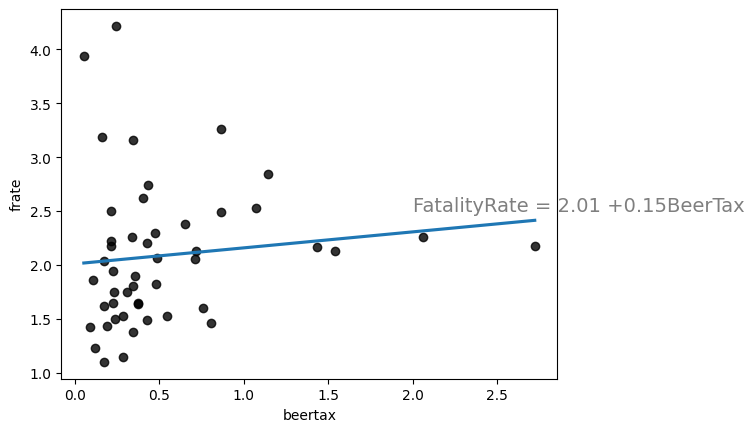

In [8]:
sns.regplot(x=df_1982['beertax'], y=df_1982['frate'], data=df_1982, scatter_kws={'color': 'black'}, ci=None, fit_reg=True)
plt.text(2.0, 2.5, s="FatalityRate = 2.01 +0.15BeerTax", fontdict=dict(color="black", alpha=0.5, size=14))

In [35]:
model_1988 = smf.ols(formula, df_1988).fit(cov_type='HC1')
model_1988.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  frate   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     11.77
Date:                Wed, 15 May 2024   Prob (F-statistic):            0.00128
Time:                        10:56:56   Log-Likelihood:                -32.871
No. Observations:                  48   AIC:                             69.74
Df Residuals:                      46   BIC:                             73.49
Df Model:                           1                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8591      0.115     16.221      0.000       1.634       2.084
beertax        0.4388      0.128      3.431      0.001       0.188       0.689
==============================================================================
Omnibus:                        5.076   Durbin-Watson:                   2.311
Prob(Omnibus):                  0.079   Jarque-Bera (JB):                4.414
Skew:                           0.741   Prob(JB):                        0.110
Kurtosis:                       3.112   Cond. No.                         2.95
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

Text(1.3, 2.25, 'FatalityRate = 1.86 +0.44BeerTax')

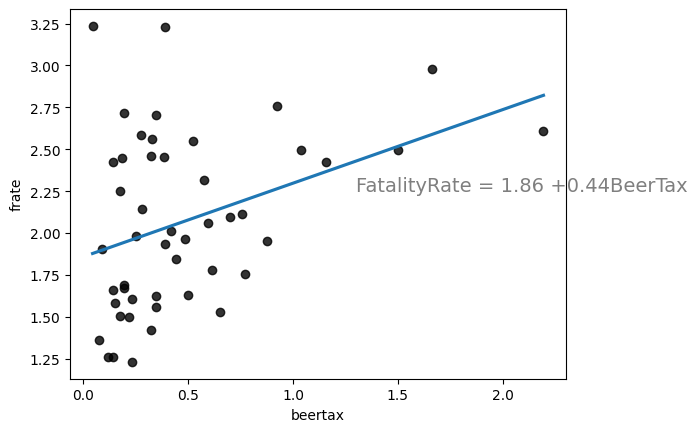

In [10]:
sns.regplot(x=df_1988['beertax'], y=df_1988['frate'], data=df_1988, scatter_kws={'color': 'black'}, ci=None, fit_reg=True)
plt.text(1.3, 2.25, s="FatalityRate = 1.86 +0.44BeerTax", fontdict=dict(color="black", alpha=0.5, size=14))

<b>

Creating the Fatality Rate and Beer Tax difference variables and running the regression

</b>

In [36]:
# Creating Fatality Rate variable

frate_diff = np.zeros(48)

j = 0
for i in range(0,335,7):
    frate_diff[j] = df.frate[i+6] - df.frate[i]
    j +=1

In [37]:
# Creating Beer Tax variable

beertax_diff = np.zeros(48)

j = 0
for i in range(0,335,7):
    beertax_diff[j] = df.beertax[i+6] - df.beertax[i]
    j +=1

In [38]:
X = sm.add_constant(beertax_diff)

model_diff = sm.OLS(frate_diff,X).fit(cov_type='HC1')
model_diff.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     8.598
Date:                Wed, 15 May 2024   Prob (F-statistic):            0.00523
Time:                        10:57:04   Log-Likelihood:                -22.383
No. Observations:                  48   AIC:                             48.77
Df Residuals:                      46   BIC:                             52.51
Df Model:                           1                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0720      0.065     -1.102      0.270      -0.200       0.056
x1            -1.0410      0.355     -2.932      0.003      -1.737      -0.345
==============================================================================
Omnibus:                       10.295   Durbin-Watson:                   2.408
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                9.784
Skew:                          -1.017   Prob(JB):                      0.00751
Kurtosis:                       3.867   Cond. No.                         7.36
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

Text(0.0, -0.25, 'D_FatalityRate = -0.072 -1.04D_BeerTax')

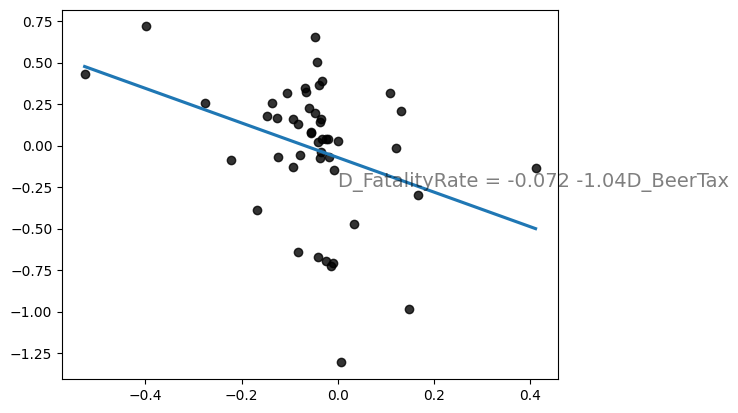

In [14]:
sns.regplot(x=beertax_diff, y=frate_diff, scatter_kws={'color': 'black'}, ci=None, fit_reg=True)
plt.text(0.0, -0.25, s="D_FatalityRate = -0.072 -1.04D_BeerTax", fontdict=dict(color="black", alpha=0.5, size=14))

## Fixed Effects Regression

In [39]:
# Calculate the State mean Beer Tax

df['beertax_state_mean'] = df.groupby('state').beertax.transform(np.mean)

# Calculate the State mean Fatality Rate

df['frate_state_mean'] = df.groupby('state').frate.transform(np.mean)
df

,Unnamed: 0,state,year,spirits,unemp,income,emppop,beertax,baptist,mormon,...,pop1517,pop1820,pop2124,milestot,unempus,emppopus,gsp,frate,beertax_state_mean,frate_state_mean
0,1,al,1982,1.37,14.4,10544.15234,50.692039,1.539379,30.355700,0.32829,...,208999.59380,221553.43750,290000.06250,28516.0,9.7,57.799999,-0.022125,2.12836,1.623793,2.412627
1,2,al,1983,1.36,13.7,10732.79785,52.147030,1.788991,30.333599,0.34341,...,202000.07810,219125.46880,290000.15630,31032.0,9.6,57.900002,0.046558,2.34848,1.623793,2.412627
2,3,al,1984,1.32,11.1,11108.79102,54.168087,1.714286,30.311501,0.35924,...,196999.96880,216724.09380,288000.15630,32961.0,7.5,59.500004,0.062798,2.33643,1.623793,2.412627
3,4,al,1985,1.28,8.9,11332.62695,55.271137,1.652542,30.289499,0.37579,...,194999.73440,214349.03130,284000.31250,35091.0,7.2,60.100002,0.027490,2.19348,1.623793,2.412627
4,5,al,1986,1.23,9.8,11661.50684,56.514496,1.609907,30.267401,0.39311,...,203999.89060,212000.00000,263000.28130,36259.0,7.0,60.700001,0.032143,2.66914,1.623793,2.412627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,332,wy,1984,1.91,6.3,13456.04395,66.022095,0.049451,2.630720,8.55593,...,21999.94141,24821.39844,36999.83984,5127.0,7.5,59.500004,-0.016678,3.06043,0.048168,3.217534
332,333,wy,1985,1.88,7.1,13595.33887,65.083801,0.047669,2.720570,8.54494,...,22000.02148,24407.24414,35000.21875,5401.0,7.2,60.100002,-0.012126,2.98625,0.048168,3.217534
333,334,wy,1986,1.70,9.0,13126.93457,63.966484,0.046440,2.813500,8.53397,...,23000.00586,23999.99805,34999.78906,5384.0,7.0,60.700001,-0.109976,3.31361,0.048168,3.217534
334,335,wy,1987,1.59,8.6,12719.00000,62.857143,0.045000,2.909600,8.52302,...,22000.02148,22999.91602,32999.67188,5367.0,6.2,61.500000,-0.123641,2.63265,0.048168,3.217534


In [40]:
# Demeaned Beer Tax

df['beertax_demeaned'] = df['beertax'] - df['beertax_state_mean']

# Demeaned  Fatality Rate

df['frate_demeaned'] = df['frate'] - df['frate_state_mean']
df

,Unnamed: 0,state,year,spirits,unemp,income,emppop,beertax,baptist,mormon,...,pop2124,milestot,unempus,emppopus,gsp,frate,beertax_state_mean,frate_state_mean,beertax_demeaned,frate_demeaned
0,1,al,1982,1.37,14.4,10544.15234,50.692039,1.539379,30.355700,0.32829,...,290000.06250,28516.0,9.7,57.799999,-0.022125,2.12836,1.623793,2.412627,-0.084413,-0.284267
1,2,al,1983,1.36,13.7,10732.79785,52.147030,1.788991,30.333599,0.34341,...,290000.15630,31032.0,9.6,57.900002,0.046558,2.34848,1.623793,2.412627,0.165198,-0.064147
2,3,al,1984,1.32,11.1,11108.79102,54.168087,1.714286,30.311501,0.35924,...,288000.15630,32961.0,7.5,59.500004,0.062798,2.33643,1.623793,2.412627,0.090493,-0.076197
3,4,al,1985,1.28,8.9,11332.62695,55.271137,1.652542,30.289499,0.37579,...,284000.31250,35091.0,7.2,60.100002,0.027490,2.19348,1.623793,2.412627,0.028750,-0.219147
4,5,al,1986,1.23,9.8,11661.50684,56.514496,1.609907,30.267401,0.39311,...,263000.28130,36259.0,7.0,60.700001,0.032143,2.66914,1.623793,2.412627,-0.013886,0.256513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,332,wy,1984,1.91,6.3,13456.04395,66.022095,0.049451,2.630720,8.55593,...,36999.83984,5127.0,7.5,59.500004,-0.016678,3.06043,0.048168,3.217534,0.001283,-0.157104
332,333,wy,1985,1.88,7.1,13595.33887,65.083801,0.047669,2.720570,8.54494,...,35000.21875,5401.0,7.2,60.100002,-0.012126,2.98625,0.048168,3.217534,-0.000498,-0.231284
333,334,wy,1986,1.70,9.0,13126.93457,63.966484,0.046440,2.813500,8.53397,...,34999.78906,5384.0,7.0,60.700001,-0.109976,3.31361,0.048168,3.217534,-0.001728,0.096076
334,335,wy,1987,1.59,8.6,12719.00000,62.857143,0.045000,2.909600,8.52302,...,32999.67188,5367.0,6.2,61.500000,-0.123641,2.63265,0.048168,3.217534,-0.003168,-0.584884


In [41]:
formula_fixed_effects = 'frate_demeaned ~ beertax_demeaned -1'

model_fixed_effects = smf.ols(formula_fixed_effects, df).fit(cov_type='HC1')
model_fixed_effects.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         frate_demeaned   R-squared (uncentered):                   0.041
Model:                            OLS   Adj. R-squared (uncentered):              0.038
Method:                 Least Squares   F-statistic:                              12.15
Date:                Wed, 15 May 2024   Prob (F-statistic):                    0.000556
Time:                        10:57:13   Log-Likelihood:                          107.97
No. Observations:                 336   AIC:                                     -213.9
Df Residuals:                     335   BIC:                                     -210.1
Df Model:                           1                                                  
Covariance Type:                  HC1                                                  
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
beertax_demeaned    -0.6559      0.188     -3.486      0.000      -1.025      -0.287
==============================================================================
Omnibus:                       53.045   Durbin-Watson:                   1.517
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.863
Skew:                           0.585   Prob(JB):                     1.81e-48
Kurtosis:                       6.786   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors are heteroscedasticity robust (HC1)
"""

<b>

The OLS estimate of the fixed effects regression line relating the real beer tax to the
fatality rate, based on all 7 years of data (336 observations), is

$$ \hat{FatalityRate} = - 0.66BeerTax + StateFixedEffects $$

</b>

In [42]:
# Calculate the State mean Beer Tax

df['beertax_statetime_mean'] = df.groupby('year').beertax_demeaned.transform(np.mean)
df['frate_statetime_mean'] = df.groupby('year').frate_demeaned.transform(np.mean)

df['beertax_statetime_demeaned'] = df['beertax_demeaned'] - df['beertax_statetime_mean']
df['frate_statetime_demeaned'] = df['frate_demeaned'] - df['frate_statetime_mean']

In [49]:
formula_both_fixed_effects = 'frate_statetime_demeaned ~ beertax_statetime_demeaned -1'

model_both_fixed_effects = smf.ols(formula_both_fixed_effects, df).fit(cov_type='HC1')
model_both_fixed_effects.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     frate_statetime_demeaned   R-squared (uncentered):                   0.036
Model:                                  OLS   Adj. R-squared (uncentered):              0.033
Method:                       Least Squares   F-statistic:                              7.526
Date:                      Wed, 15 May 2024   Prob (F-statistic):                     0.00641
Time:                              10:59:07   Log-Likelihood:                          115.04
No. Observations:                       336   AIC:                                     -228.1
Df Residuals:                           335   BIC:                                     -224.3
Df Model:                                 1                                                  
Covariance Type:                        HC1                                                  
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
beertax_statetime_demeaned    -0.6400      0.233     -2.743      0.006      -1.097      -0.183
==============================================================================
Omnibus:                       38.201   Durbin-Watson:                   1.484
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.359
Skew:                           0.333   Prob(JB):                     2.04e-36
Kurtosis:                       6.361   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors are heteroscedasticity robust (HC1)
"""

The regression with both fixed time and entity effects is

$$\hat{FatalityRate}=−0.66BeerTax+StateFixedEffects+TimeFixedEffects$$

### Guns

Some U.S. states have enacted laws that allow citizens to carry concealed weapons. These laws are known as “shall-issue” laws because they instruct local authorities to issue a concealed weapons permit to all applicants who are citizens, are mentally competent, and have not been convicted of a felony. (Some states have some additional restrictions.)

Proponents argue that if more people carry concealed weapons, crime will decline because criminals will be deterred from attacking other people. Opponents argue that crime will increase because of accidental or spontaneous use of the weapons.

In this
exercise, you will analyze the effect of concealed weapons laws on violent crimes. The data file [<b>Guns.xlsx</b>](https://www.princeton.edu/~mwatson/Stock-Watson_3u/Students/EE_Datasets/Guns.xlsx) which contains a balanced panel of data from the 50 U.S. states plus the District of Columbia for the years 1977 through 1999. A detailed description is given [here](https://www.princeton.edu/~mwatson/Stock-Watson_3u/Students/EE_Datasets/Guns_Description.pdf).

The dataset is used in the reference textbook Introduction to Econometrics, 4th edition 
(Stock and Watson).

<b>

1. Estimate (1) a regression of <i>ln(vio)</i> against <i>shall</i> and (2) a regression of <i>ln(vio)</i> against <i>shall</i>, <i>incarc_rate</i>, <i>density</i>, <i>avginc</i>, <i>pop</i>, <i>pb1064</i>, <i>pw1064</i></i>, and <i>pm1029</i>.

</b>

In [18]:
df = pd.read_excel("Guns.xlsx")

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [20]:
df

,year,vio,mur,rob,incarc_rate,pb1064,pw1064,pm1029,pop,avginc,density,stateid,shall
0,77,414.4,14.2,96.8,83,8.384873,55.12291,18.17441,3.780403,9.563148,0.074552,1,0
1,78,419.1,13.3,99.1,94,8.352101,55.14367,17.99408,3.831838,9.932000,0.075567,1,0
2,79,413.3,13.2,109.5,144,8.329575,55.13586,17.83934,3.866248,9.877028,0.076245,1,0
3,80,448.5,13.2,132.1,141,8.408386,54.91259,17.73420,3.900368,9.541428,0.076829,1,0
4,81,470.5,11.9,126.5,149,8.483435,54.92513,17.67372,3.918531,9.548351,0.077187,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168,95,254.2,2.1,17.9,254,1.485849,73.71621,15.37098,0.478447,14.070160,0.004927,56,1
1169,96,249.7,3.3,20.4,289,1.521814,73.85796,15.44601,0.480085,14.032230,0.004944,56,1
1170,97,255.2,3.5,17.7,310,1.527818,73.92731,15.49400,0.480031,14.790980,0.004943,56,1
1171,98,247.6,4.8,16.2,326,1.558396,73.98515,15.51021,0.480045,15.225510,0.004944,56,1


In [21]:
df['ln_vio'] = np.log(df.vio)
df

,year,vio,mur,rob,incarc_rate,pb1064,pw1064,pm1029,pop,avginc,density,stateid,shall,ln_vio
0,77,414.4,14.2,96.8,83,8.384873,55.12291,18.17441,3.780403,9.563148,0.074552,1,0,6.026832
1,78,419.1,13.3,99.1,94,8.352101,55.14367,17.99408,3.831838,9.932000,0.075567,1,0,6.038110
2,79,413.3,13.2,109.5,144,8.329575,55.13586,17.83934,3.866248,9.877028,0.076245,1,0,6.024174
3,80,448.5,13.2,132.1,141,8.408386,54.91259,17.73420,3.900368,9.541428,0.076829,1,0,6.105909
4,81,470.5,11.9,126.5,149,8.483435,54.92513,17.67372,3.918531,9.548351,0.077187,1,0,6.153796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168,95,254.2,2.1,17.9,254,1.485849,73.71621,15.37098,0.478447,14.070160,0.004927,56,1,5.538121
1169,96,249.7,3.3,20.4,289,1.521814,73.85796,15.44601,0.480085,14.032230,0.004944,56,1,5.520260
1170,97,255.2,3.5,17.7,310,1.527818,73.92731,15.49400,0.480031,14.790980,0.004943,56,1,5.542048
1171,98,247.6,4.8,16.2,326,1.558396,73.98515,15.51021,0.480045,15.225510,0.004944,56,1,5.511815


In [22]:
formula_1 = 'ln_vio ~  shall'

model = smf.ols(formula_1, df).fit(cov_type='HC1')
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 ln_vio   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     86.86
Date:                Wed, 15 May 2024   Prob (F-statistic):           5.60e-20
Time:                        10:17:50   Log-Likelihood:                -1097.7
No. Observations:                1173   AIC:                             2199.
Df Residuals:                    1171   BIC:                             2209.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.1349      0.019    317.807      0.000       6.097       6.173
shall         -0.4430      0.048     -9.320      0.000      -0.536      -0.350
==============================================================================
Omnibus:                       18.398   Durbin-Watson:                   0.122
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.050
Skew:                          -0.239   Prob(JB):                     2.69e-05
Kurtosis:                       3.450   Cond. No.                         2.50
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [23]:
formula_2 = 'ln_vio ~  shall + incarc_rate + density + avginc + pop + pb1064 + pw1064 + pm1029'

model2 = smf.ols(formula_2, df).fit(cov_type='HC1')
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 ln_vio   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     95.67
Date:                Wed, 15 May 2024   Prob (F-statistic):          3.97e-122
Time:                        10:19:51   Log-Likelihood:                -663.61
No. Observations:                1173   AIC:                             1345.
Df Residuals:                    1164   BIC:                             1391.
Df Model:                           8                                         
Covariance Type:                  HC1                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.9817      0.609      4.896      0.000       1.788       4.175
shall          -0.3684      0.035    -10.590      0.000      -0.437      -0.300
incarc_rate     0.0016      0.000      8.925      0.000       0.001       0.002
density         0.0267      0.014      1.860      0.063      -0.001       0.055
avginc          0.0012      0.007      0.166      0.868      -0.013       0.015
pop             0.0427      0.003     13.573      0.000       0.037       0.049
pb1064          0.0809      0.020      4.044      0.000       0.042       0.120
pw1064          0.0312      0.010      3.208      0.001       0.012       0.050
pm1029          0.0089      0.012      0.736      0.462      -0.015       0.033
==============================================================================
Omnibus:                       71.332   Durbin-Watson:                   0.188
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.822
Skew:                          -0.600   Prob(JB):                     3.81e-19
Kurtosis:                       3.543   Cond. No.                     1.28e+04
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 1.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<b>

i. Interpret the coefficient on shall in regression (2). Is this estimate large or small in a real-world sense?
    
</b>

The coefficient is -0.3684, which suggests that shall-issue laws reduce the rate of violent crimes by 36%. This is a considerable decrease in a real-world sense.

<b>

ii. Does adding the control variables in regression (2) change the estimated effect of a shall-issue law in regression (1) as measured
by statistical significance? As measured by the real-world significance of the estimated coefficient?

</b>

The coefficient is regression (1) for <i>shall</i> is -0.433 and in regression (2) is -0.3684. Adding the control variables result in a decrease in the estimated effect of the coefficient.

The p-value is 0% for the coefficient in both regressions and, therefore, both are statistically significant.

<b>

iii. Suggest a variable that varies across states but plausibly varies little—or not at all—over time and that could cause omitted variable bias in regression (2).

</b>

Possible variables that might vary across state is the quality and level of training of the police force and other crime prevention programmes.

<b>

2. Do the results change when you add fixed state effects? If so, which set of regression results is more credible, and why?
    
</b>

In [25]:
# Calculate the State means

df['lvio_state_mean'] = df.groupby('stateid').ln_vio.transform(np.mean)
df['shall_state_mean'] = df.groupby('stateid').shall.transform(np.mean)
df['irate_state_mean'] = df.groupby('stateid').incarc_rate.transform(np.mean)
df['density_state_mean'] = df.groupby('stateid').density.transform(np.mean)
df['avginc_state_mean'] = df.groupby('stateid').avginc.transform(np.mean)
df['pop_state_mean'] = df.groupby('stateid').pop.transform(np.mean)
df['pb1064_state_mean'] = df.groupby('stateid').pb1064.transform(np.mean)
df['pw1064_state_mean'] = df.groupby('stateid').pw1064.transform(np.mean)
df['pm1029_state_mean'] = df.groupby('stateid').pm1029.transform(np.mean)

# Demeaned Variables

df['lvio_demeaned'] = df['ln_vio'] - df['lvio_state_mean']
df['shall_demeaned'] = df['shall'] - df['shall_state_mean']
df['irate_demeaned'] = df['incarc_rate'] - df['irate_state_mean']
df['density_demeaned'] = df['density'] - df['density_state_mean']
df['avginc_demeaned'] = df['avginc'] - df['avginc_state_mean']
df['pop_demeaned'] = df['pop'] - df['pop_state_mean']
df['pb1064_demeaned'] = df['pb1064'] - df['pb1064_state_mean']
df['pw1064_demeaned'] = df['pw1064'] - df['pw1064_state_mean']
df['pm1029_demeaned'] = df['pm1029'] - df['pm1029_state_mean']

formula_fixed_effects = 'lvio_demeaned ~ shall_demeaned + irate_demeaned + density_demeaned + avginc_demeaned + pop_demeaned + pb1064_demeaned + pw1064_demeaned + pm1029_demeaned -1'

model_fixed_effects = smf.ols(formula_fixed_effects, df).fit(cov_type='HC1')
model_fixed_effects.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          lvio_demeaned   R-squared (uncentered):                   0.218
Model:                            OLS   Adj. R-squared (uncentered):              0.212
Method:                 Least Squares   F-statistic:                              29.39
Date:                Wed, 15 May 2024   Prob (F-statistic):                    5.12e-42
Time:                        10:25:34   Log-Likelihood:                          510.18
No. Observations:                1173   AIC:                                     -1004.
Df Residuals:                    1165   BIC:                                     -963.8
Df Model:                           8                                                  
Covariance Type:                  HC1                                                  
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
shall_demeaned      -0.0461      0.020     -2.366      0.018      -0.084      -0.008
irate_demeaned   -7.101e-05   9.52e-05     -0.746      0.456      -0.000       0.000
density_demeaned    -0.1723      0.103     -1.680      0.093      -0.373       0.029
avginc_demeaned     -0.0092      0.007     -1.398      0.162      -0.022       0.004
pop_demeaned         0.0115      0.009      1.214      0.225      -0.007       0.030
pb1064_demeaned      0.1043      0.016      6.442      0.000       0.073       0.136
pw1064_demeaned      0.0409      0.005      7.758      0.000       0.031       0.051
pm1029_demeaned     -0.0503      0.008     -6.599      0.000      -0.065      -0.035
==============================================================================
Omnibus:                       11.796   Durbin-Watson:                   0.427
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               14.493
Skew:                          -0.144   Prob(JB):                     0.000713
Kurtosis:                       3.462   Cond. No.                     2.13e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors are heteroscedasticity robust (HC1)
[3] The condition number is large, 2.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The value of the coefficient for the variable <i>shall</i> falls drastically to -0.0461 in the regression with fixed effects (an impact of only 4% in reducing violent crime). This suggests that there was ommitted variable bias in the regression without fixed effects.

The regression with fixed effects is more credible because it controls for unobserved factors across US states.